In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb


In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/gred/car details v4.csv')

# Display first few rows of the dataset
print(df.head())

# Handle missing data for numeric columns only
numeric_columns = df.select_dtypes(include=np.number).columns  # Get numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean()) # Fill NaNs in those

# Convert categorical columns to numeric using OneHotEncoder
categorical_columns = ['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Seller Type']
numerical_columns = ['Year', 'Kilometer', 'Owner', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain',
                     'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

# ... (Rest of your code)

            Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   

            Max Power              Max Torque Drivetrain  Length   W

In [4]:
# ipython-input-20-72466097f8a2

# ... (Previous code)

# Convert categorical columns to numeric using OneHotEncoder
categorical_columns = ['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Seller Type', 'Owner'] # Added 'Owner' here
numerical_columns = ['Year', 'Kilometer', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain',
                     'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity'] # Removed 'Owner' here

# ... (Rest of your code)

In [5]:
X = df[categorical_columns + numerical_columns]
y = df['Price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb

# Example: Replace X and y with your actual dataset
# df = pd.read_csv("your_dataset.csv")
# X = df.drop("target_column", axis=1)
# y = df["target_column"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numeric columns
categorical_features = X_train.select_dtypes(include=['object']).columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Debugging: Print identified features
print("Categorical Features:", categorical_features)
print("Numeric Features:", numeric_features)

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values for numeric columns
    ('scaler', StandardScaler())                 # Scale numeric values
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values for categorical columns
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # Encode categorical values
])

# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Debugging: Ensure preprocessing steps work correctly
try:
    preprocessed_sample = preprocessor.fit_transform(X_train)
    print("Preprocessing successful! Sample shape after transformation:", preprocessed_sample.shape)
except Exception as e:
    print("Error during preprocessing:", e)

# Define the list of models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'HistGradient Boosting': HistGradientBoostingRegressor()
}

# Evaluate each model
results = {}

for name, model in models.items():
    # Create a pipeline with preprocessor and model
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Fit the model on the training data
    try:
        model_pipeline.fit(X_train, y_train)
    except Exception as e:
        print(f"Error fitting model {name}:", e)
        continue  # Skip to the next model if this one fails

    # Make predictions on the test data
    y_pred = model_pipeline.predict(X_test)

    # Evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Create a DataFrame for easier comparison
results_df = pd.DataFrame(results).T
print(results_df)


Categorical Features: Index(['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color',
       'Seller Type', 'Owner', 'Engine', 'Max Power', 'Max Torque',
       'Drivetrain'],
      dtype='object')
Numeric Features: Index(['Year', 'Kilometer', 'Length', 'Width', 'Height', 'Seating Capacity',
       'Fuel Tank Capacity'],
      dtype='object')
Preprocessing successful! Sample shape after transformation: (1647, 1736)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33514672289406.23, tolerance: 917260351366.4423
  model = cd_fast.sparse_enet_coordinate_descent(


Error fitting model HistGradient Boosting: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.
                             MAE           MSE          RMSE        R2
Linear Regression  511964.264266  2.823214e+12  1.680242e+06  0.595892
Ridge Regression   490166.387343  2.666821e+12  1.633040e+06  0.618278
Lasso Regression   597493.688315  3.066080e+12  1.751022e+06  0.561129
Decision Tree      413291.264563  2.504106e+12  1.582437e+06  0.641568
Random Forest      338586.122557  2.048601e+12  1.431293e+06  0.706768
XGBoost            284642.892151  1.215557e+12  1.102523e+06  0.826008
Gradient Boosting  380493.667557  1.543176e+12  1.242246e+06  0.779113


Results DataFrame:
                             MAE           MSE          RMSE        R2
Linear Regression  511964.264266  2.823214e+12  1.680242e+06  0.595892
Ridge Regression   490166.387343  2.666821e+12  1.633040e+06  0.618278
Lasso Regression   597493.688315  3.066080e+12  1.751022e+06  0.561129
Decision Tree      413291.264563  2.504106e+12  1.582437e+06  0.641568
Random Forest      338586.122557  2.048601e+12  1.431293e+06  0.706768
XGBoost            284642.892151  1.215557e+12  1.102523e+06  0.826008
Gradient Boosting  380493.667557  1.543176e+12  1.242246e+06  0.779113
The best model is XGBoost with an R2 score of 0.8260


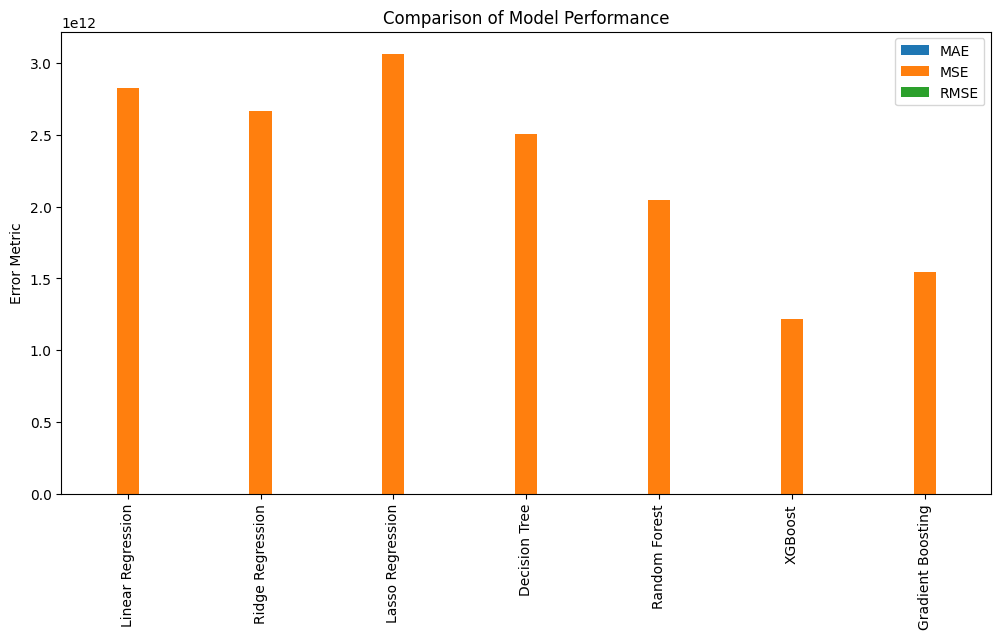

In [7]:
# Check the structure of the results DataFrame
print("Results DataFrame:")
print(results_df)

# Drop models with missing or NaN 'R2' scores
if 'R2' in results_df.columns:
    valid_results = results_df.dropna(subset=['R2'])
    if valid_results.empty:
        print("No models have valid R2 scores. Please check the pipeline or dataset.")
    else:
        # Compare models by R2 score
        best_model = valid_results['R2'].idxmax()
        print(f"The best model is {best_model} with an R2 score of {valid_results.loc[best_model, 'R2']:.4f}")

        # Plot the performance of the models
        valid_results[['MAE', 'MSE', 'RMSE']].plot(kind='bar', figsize=(12, 6))
        plt.title('Comparison of Model Performance')
        plt.ylabel('Error Metric')
        plt.show()
else:
    print("'R2' column is missing from results_df. Ensure that the pipeline evaluates and stores R2 scores correctly.")


In [8]:
print(results_df)


                             MAE           MSE          RMSE        R2
Linear Regression  511964.264266  2.823214e+12  1.680242e+06  0.595892
Ridge Regression   490166.387343  2.666821e+12  1.633040e+06  0.618278
Lasso Regression   597493.688315  3.066080e+12  1.751022e+06  0.561129
Decision Tree      413291.264563  2.504106e+12  1.582437e+06  0.641568
Random Forest      338586.122557  2.048601e+12  1.431293e+06  0.706768
XGBoost            284642.892151  1.215557e+12  1.102523e+06  0.826008
Gradient Boosting  380493.667557  1.543176e+12  1.242246e+06  0.779113


In [10]:
# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    sparse_threshold=0  # Always return dense output
)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.351e+13, tolerance: 9.173e+11
  model = cd_fast.enet_coordinate_descent(


Model Performance:
                                MAE           MSE          RMSE            R2  \
Linear Regression      3.553674e+17  1.143768e+36  1.069471e+18 -1.637163e+23   
Ridge Regression       4.901662e+05  2.666813e+12  1.633038e+06  6.182787e-01   
Lasso Regression       5.974937e+05  3.066080e+12  1.751022e+06  5.611286e-01   
Decision Tree          4.064636e+05  2.553909e+12  1.598095e+06  6.344395e-01   
Random Forest          3.399180e+05  2.050650e+12  1.432009e+06  7.064748e-01   
XGBoost                2.871209e+05  1.029119e+12  1.014455e+06  8.526943e-01   
Gradient Boosting      3.793845e+05  1.706200e+12  1.306216e+06  7.557785e-01   
HistGradient Boosting  3.655447e+05  2.165725e+12  1.471640e+06  6.900032e-01   

                       Accuracy (%)  
Linear Regression     -2.056140e+13  
Ridge Regression       7.163920e+01  
Lasso Regression       6.542928e+01  
Decision Tree          7.648219e+01  
Random Forest          8.033250e+01  
XGBoost                

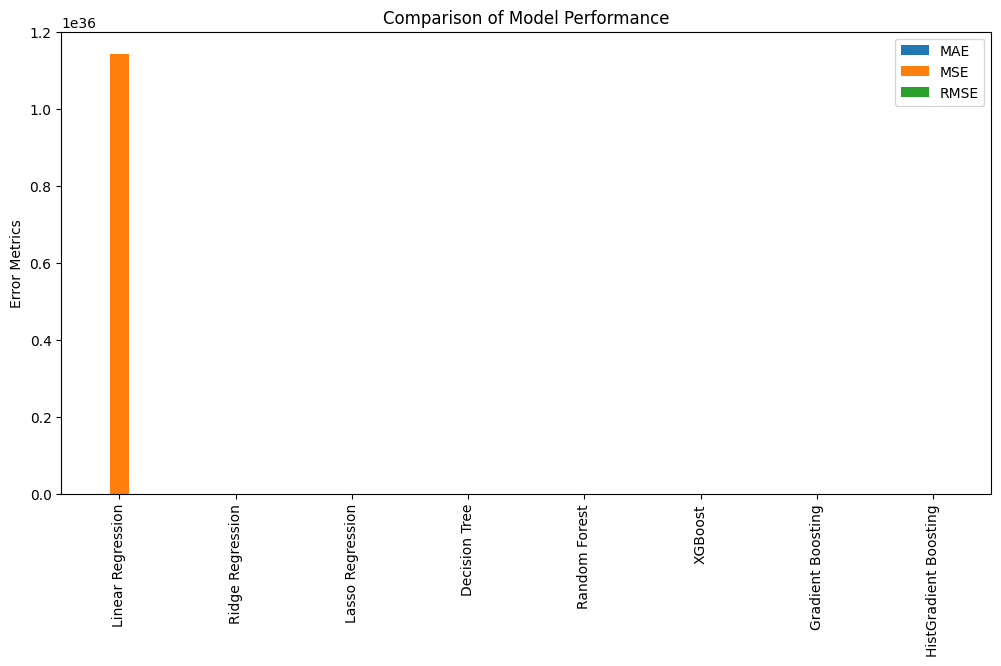

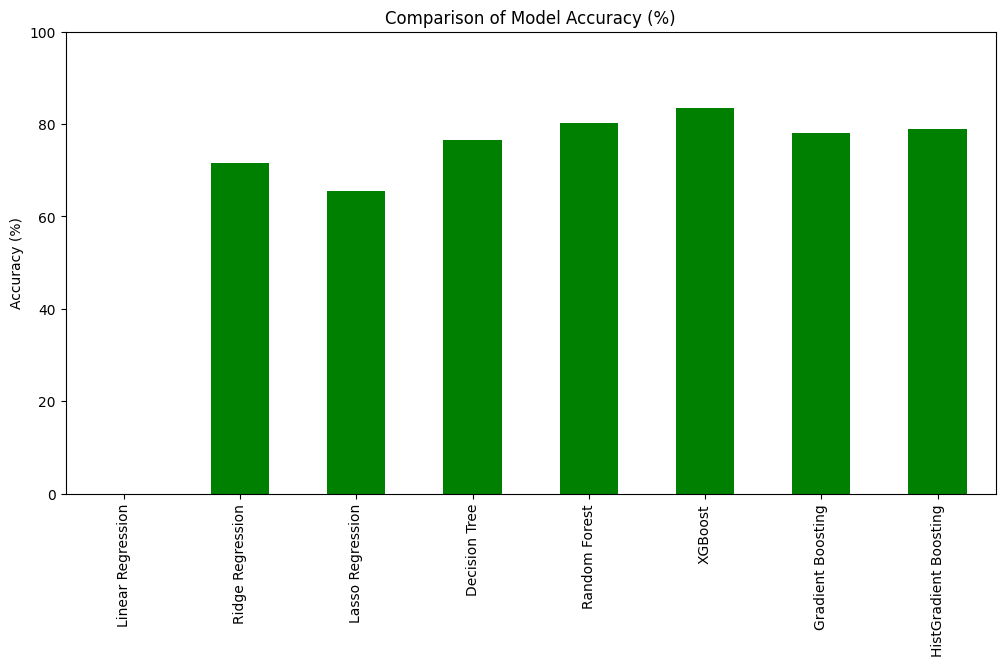

In [14]:
# 7. Evaluate Each Model
results = {}

for name, model in models.items():
    # Create pipeline with preprocessor and model
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Fit the model on the training data
    model_pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model_pipeline.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate accuracy as a percentage
    accuracy = (1 - (mae / y_test.mean())) * 100  # Convert to percentage

    # Store the results
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'Accuracy (%)': accuracy}

# 8. Display Results
results_df = pd.DataFrame(results).T
print("Model Performance:")
print(results_df)

# 9. Identify the Best Model by R² Score
best_model = results_df['R2'].idxmax()
print(f"The best model is {best_model} with an R² score of {results_df.loc[best_model, 'R2']:.4f}")

# 10. Visualize the Performance of Models
results_df[['MAE', 'MSE', 'RMSE']].plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Model Performance')
plt.ylabel('Error Metrics')
plt.show()

# 11. Visualize Accuracy of Models
results_df['Accuracy (%)'].plot(kind='bar', figsize=(12, 6), color='green')
plt.title('Comparison of Model Accuracy (%)')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Accuracy percentage is between 0 and 100
plt.show()
